In [1]:
# Cell 1: Import necessary libraries and set up the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Set up plotting style
sns.set_style("whitegrid")

In [2]:
# Cell 2: Define SMILES for known BACE1 inhibitors and other neurological drugs
smiles_dict = {
    "Verubecestat": "CC1(C(=O)NC(=O)NC1=O)C2=CC=C(C=C2)C3=CC(=CC(=C3)S(=O)(=O)N4CCCC4)F",
    "Lanabecestat": "CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCC(CC3)NC(=O)C4(CC4)NC(=O)C5CC5)F",
    "Atabecestat": "CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)NC(=O)C4(CC4)NC(=O)C5CC5",
    "Elenbecestat": "CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)NC(=O)C4(CCCC4)NC(=O)C5CC5",
    "Donepezil": "COC1=C(C=C2C(=C1)CC(=O)N(C2)CC3CCN(CC3)CC4=CC=CC=C4)OC",
    "Memantine": "CC12CC3CC(C1)(CC(C3)(C2)N)C",
    "Rivastigmine": "CCN(C)C(=O)OC1=CC=CC(=C1)C(C)N(C)C",
    "Galantamine": "CN1CCC23C4C1CC5=C2C(=C(C=C5)OC)OC3C(C=C4)O"
}

# Create a DataFrame
df_smiles = pd.DataFrame(list(smiles_dict.items()), columns=["compound", "smiles"])
df_smiles

compound                                             smiles
0  Verubecestat  CC1(C(=O)NC(=O)NC1=O)C2=CC=C(C=C2)C3=CC(=CC(=C...
1  Lanabecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCC(CC3...
2   Atabecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)N...
3  Elenbecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)N...
4     Donepezil  COC1=C(C=C2C(=C1)CC(=O)N(C2)CC3CCN(CC3)CC4=CC=...
5     Memantine                        CC12CC3CC(C1)(CC(C3)(C2)N)C
6  Rivastigmine                 CCN(C)C(=O)OC1=CC=CC(=C1)C(C)N(C)C
7   Galantamine         CN1CCC23C4C1CC5=C2C(=C(C=C5)OC)OC3C(C=C4)O

In [3]:
# Cell 3: Calculate molecular properties using RDKit
def calc_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return {
        "MolWt": Descriptors.ExactMolWt(mol),
        "LogP": Descriptors.MolLogP(mol),
        "HBD": Descriptors.NumHDonors(mol),
        "HBA": Descriptors.NumHAcceptors(mol),
        "PSA": Descriptors.TPSA(mol),
        "RotBonds": Descriptors.NumRotatableBonds(mol)
    }

# Apply the function to each SMILES
properties = df_smiles["smiles"].apply(calc_properties).apply(pd.Series)
df_smiles = pd.concat([df_smiles, properties], axis=1)
df_smiles

compound                                             smiles  \
0  Verubecestat  CC1(C(=O)NC(=O)NC1=O)C2=CC=C(C=C2)C3=CC(=CC(=C...   
1  Lanabecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCC(CC3...   
2   Atabecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)N...   
3  Elenbecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)N...   
4     Donepezil  COC1=C(C=C2C(=C1)CC(=O)N(C2)CC3CCN(CC3)CC4=CC=...   
5     Memantine                        CC12CC3CC(C1)(CC(C3)(C2)N)C   
6  Rivastigmine                 CCN(C)C(=O)OC1=CC=CC(=C1)C(C)N(C)C   
7   Galantamine         CN1CCC23C4C1CC5=C2C(=C(C=C5)OC)OC3C(C=C4)O   

        MolWt     LogP  HBD  HBA     PSA  RotBonds  
0  445.110770  1.90090  2.0  5.0  112.65       4.0  
1  499.194106  3.12922  2.0  4.0   95.58       7.0  
2  467.187877  3.44382  2.0  4.0   95.58       7.0  
3  495.219178  4.22402  2.0  4.0   95.58       7.0  
4  394.225643  3.50070  0.0  4.0   42.01       6.0  
5  179.167400  2.69410  1.0  1.0   26.02       0.0  
6  250.168128  2.75970  0.0  3.0   32.78       4.0  
7  299.152144  1.50110  1.0  4.0   41.93       1.0

In [5]:
# Cell 4: Estimate logS using a simple method based on LogP
def estimate_logs(logp):
    # This is a very rough estimation and should not be used for accurate predictions
    return -0.8 * logp - 0.5

df_smiles['logS'] = df_smiles['LogP'].apply(estimate_logs)
df_smiles['logS'] = df_smiles['logS'].round(3)
df_smiles['logS_warn'] = "Estimated from LogP"

df_smiles

compound                                             smiles  \
0  Verubecestat  CC1(C(=O)NC(=O)NC1=O)C2=CC=C(C=C2)C3=CC(=CC(=C...   
1  Lanabecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCC(CC3...   
2   Atabecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)N...   
3  Elenbecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)N...   
4     Donepezil  COC1=C(C=C2C(=C1)CC(=O)N(C2)CC3CCN(CC3)CC4=CC=...   
5     Memantine                        CC12CC3CC(C1)(CC(C3)(C2)N)C   
6  Rivastigmine                 CCN(C)C(=O)OC1=CC=CC(=C1)C(C)N(C)C   
7   Galantamine         CN1CCC23C4C1CC5=C2C(=C(C=C5)OC)OC3C(C=C4)O   

        MolWt     LogP  HBD  HBA     PSA  RotBonds   logS            logS_warn  
0  445.110770  1.90090  2.0  5.0  112.65       4.0 -2.021  Estimated from LogP  
1  499.194106  3.12922  2.0  4.0   95.58       7.0 -3.003  Estimated from LogP  
2  467.187877  3.44382  2.0  4.0   95.58       7.0 -3.255  Estimated from LogP  
3  495.219178  4.22402  2.0  4.0   95.58       7.0 -3.879  Estimated from LogP  
4  394.225643  3.50070  0.0  4.0   42.01       6.0 -3.301  Estimated from LogP  
5  179.167400  2.69410  1.0  1.0   26.02       0.0 -2.655  Estimated from LogP  
6  250.168128  2.75970  0.0  3.0   32.78       4.0 -2.708  Estimated from LogP  
7  299.152144  1.50110  1.0  4.0   41.93       1.0 -1.701  Estimated from LogP

In [6]:
# Cell 4: Predict logS with soltrannet
import soltrannet as stn

for ix, row in df_smiles.iterrows():
    logS, _, logS_warn = next(stn.predict([row.smiles]))
    df_smiles.at[ix, "logS"] = round(logS, 3)
    df_smiles.at[ix, "logS_warn"] = logS_warn

df_smiles

compound                                             smiles  \
0  Verubecestat  CC1(C(=O)NC(=O)NC1=O)C2=CC=C(C=C2)C3=CC(=CC(=C...   
1  Lanabecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCC(CC3...   
2   Atabecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)N...   
3  Elenbecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)N...   
4     Donepezil  COC1=C(C=C2C(=C1)CC(=O)N(C2)CC3CCN(CC3)CC4=CC=...   
5     Memantine                        CC12CC3CC(C1)(CC(C3)(C2)N)C   
6  Rivastigmine                 CCN(C)C(=O)OC1=CC=CC(=C1)C(C)N(C)C   
7   Galantamine         CN1CCC23C4C1CC5=C2C(=C(C=C5)OC)OC3C(C=C4)O   

        MolWt     LogP  HBD  HBA     PSA  RotBonds   logS logS_warn  
0  445.110770  1.90090  2.0  5.0  112.65       4.0 -5.227            
1  499.194106  3.12922  2.0  4.0   95.58       7.0 -5.829            
2  467.187877  3.44382  2.0  4.0   95.58       7.0 -5.737            
3  495.219178  4.22402  2.0  4.0   95.58       7.0 -6.026            
4  394.225643  3.50070  0.0  4.0   42.01       6.0 -3.875            
5  179.167400  2.69410  1.0  1.0   26.02       0.0 -2.017            
6  250.168128  2.75970  0.0  3.0   32.78       4.0 -1.736            
7  299.152144  1.50110  1.0  4.0   41.93       1.0 -2.605

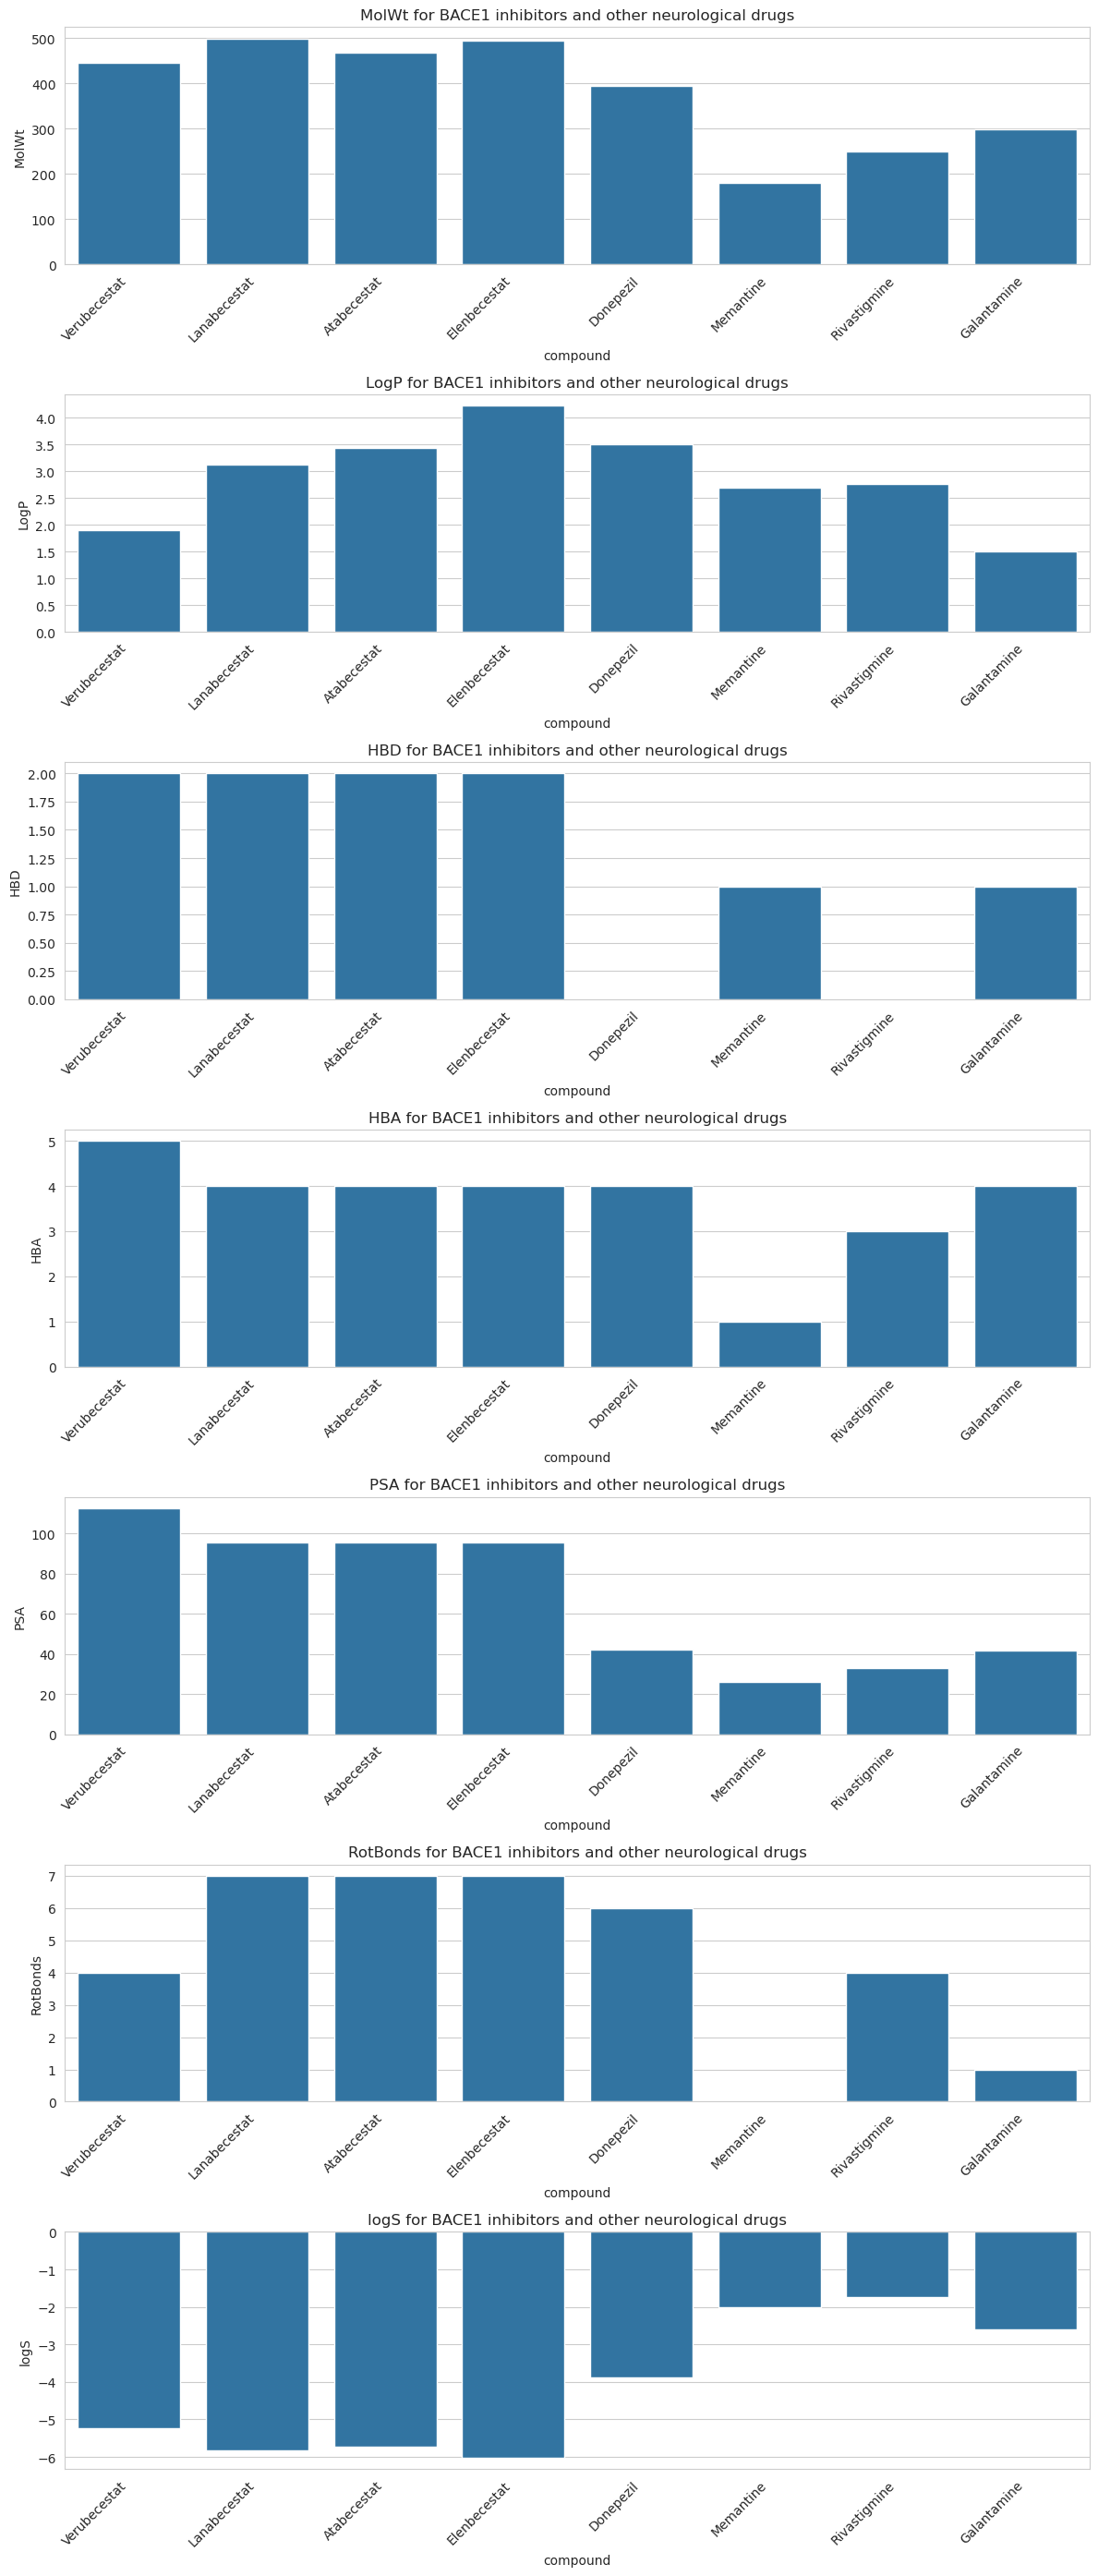

In [7]:
# Cell 5: Create plots for molecular properties including logS
properties_to_plot = ["MolWt", "LogP", "HBD", "HBA", "PSA", "RotBonds", "logS"]

f, axs = plt.subplots(len(properties_to_plot), 1, figsize=(12, 4*len(properties_to_plot)), constrained_layout=True)

for i, prop in enumerate(properties_to_plot):
    sns.barplot(data=df_smiles, x="compound", y=prop, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
    axs[i].set_title(f"{prop} for BACE1 inhibitors and other neurological drugs")

plt.tight_layout()
plt.show()

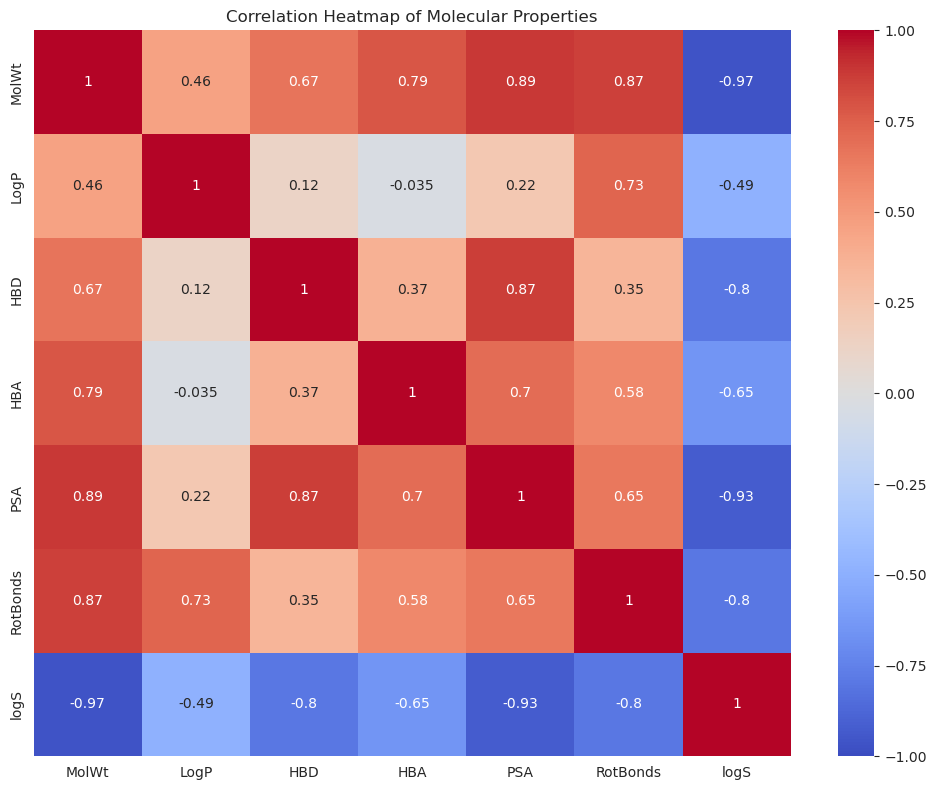

In [8]:
# Cell 6: Create a correlation heatmap
correlation_matrix = df_smiles[properties_to_plot].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap of Molecular Properties")
plt.tight_layout()
plt.show()

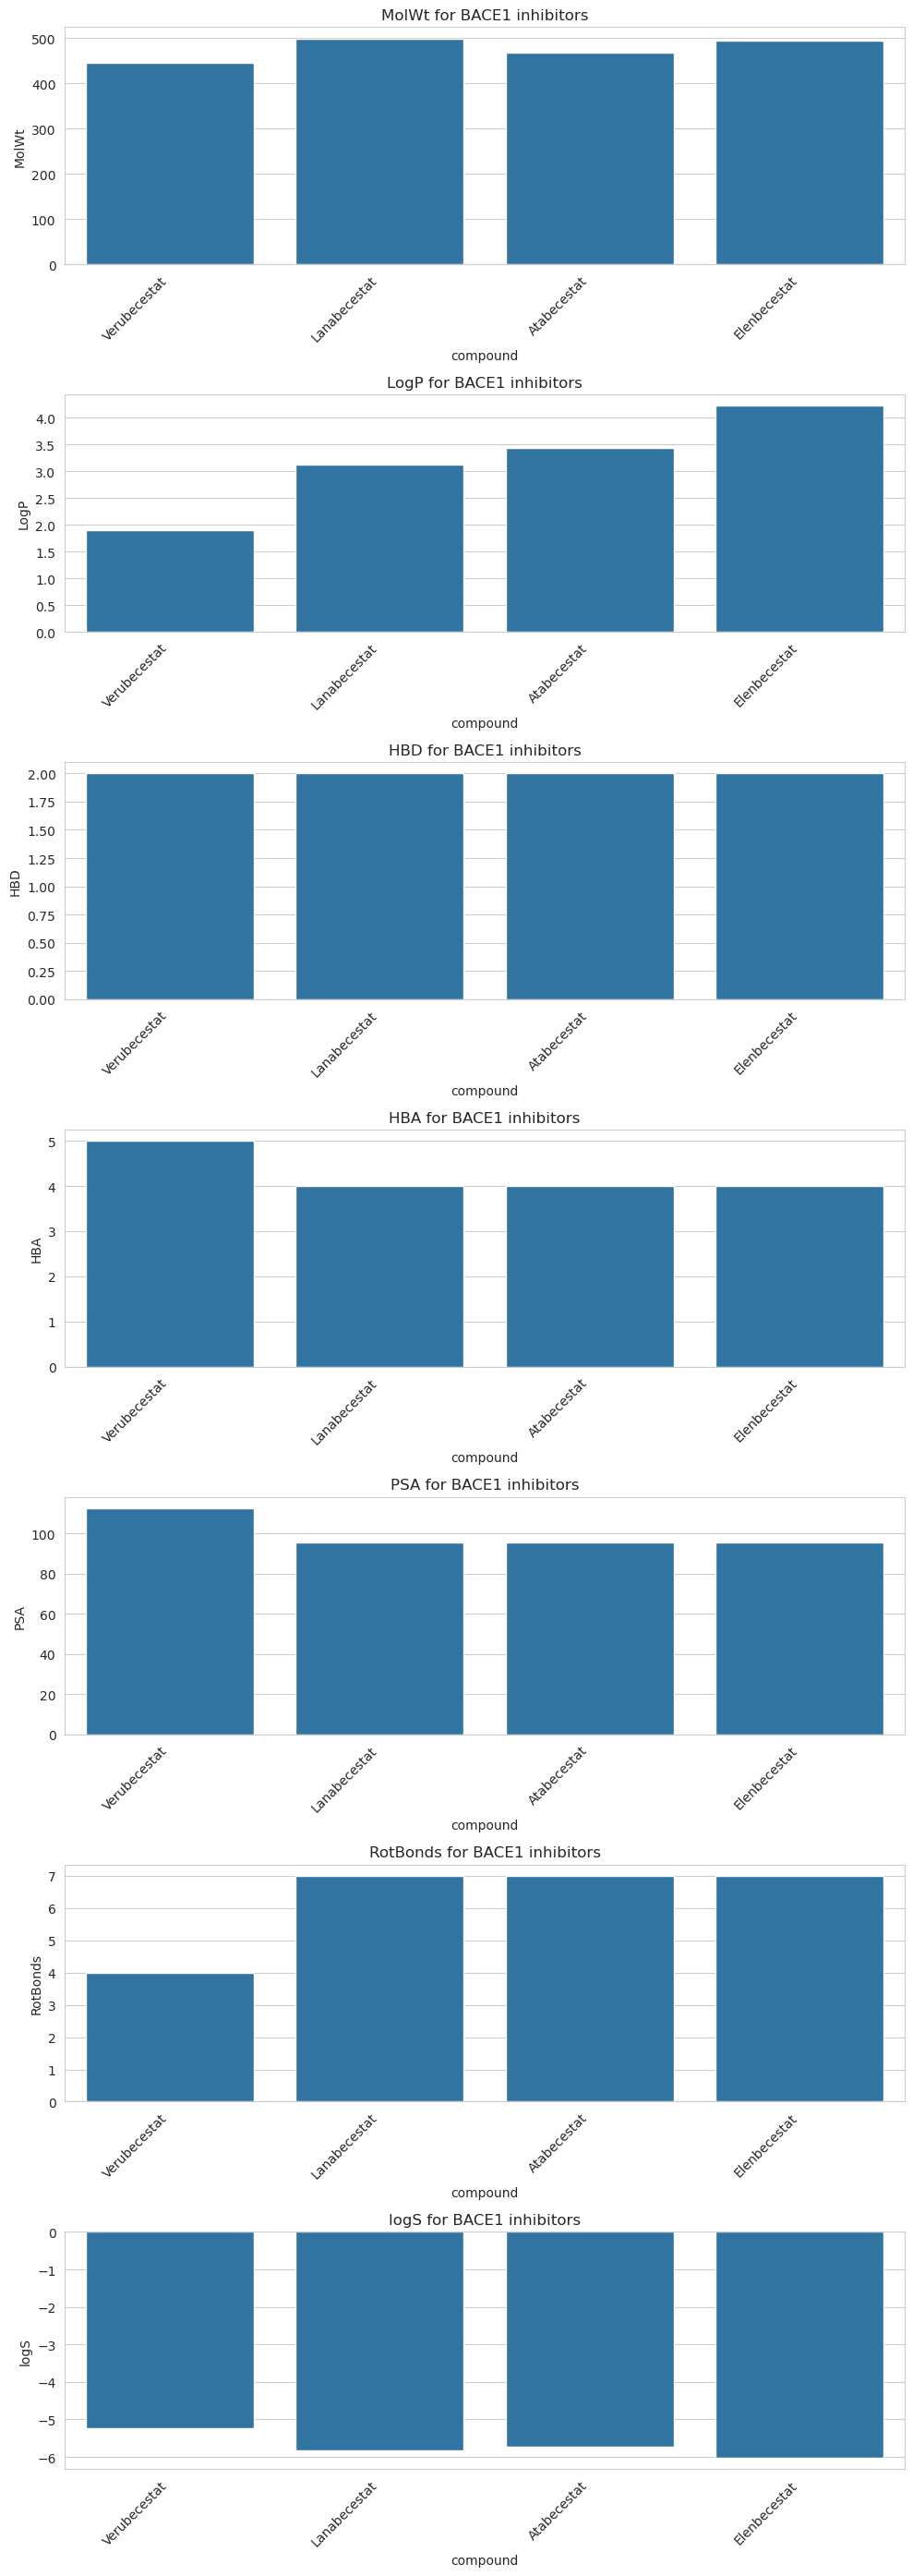

In [9]:
# Cell 7: Analyze BACE1 inhibitors separately
bace1_inhibitors = ["Verubecestat", "Lanabecestat", "Atabecestat", "Elenbecestat"]
df_bace1 = df_smiles[df_smiles["compound"].isin(bace1_inhibitors)]

f, axs = plt.subplots(len(properties_to_plot), 1, figsize=(10, 4*len(properties_to_plot)), constrained_layout=True)

for i, prop in enumerate(properties_to_plot):
    sns.barplot(data=df_bace1, x="compound", y=prop, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
    axs[i].set_title(f"{prop} for BACE1 inhibitors")

plt.tight_layout()
plt.show()

In [12]:
# Cell 9: Inspect DataFrame
print(df_smiles.columns)
print(df_smiles.head())

Index(['compound', 'smiles', 'MolWt', 'LogP', 'HBD', 'HBA', 'PSA', 'RotBonds',
       'logS', 'logS_warn', 'is_bace1_inhibitor'],
      dtype='object')
       compound                                             smiles  \
0  Verubecestat  CC1(C(=O)NC(=O)NC1=O)C2=CC=C(C=C2)C3=CC(=CC(=C...   
1  Lanabecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCC(CC3...   
2   Atabecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)N...   
3  Elenbecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)N...   
4     Donepezil  COC1=C(C=C2C(=C1)CC(=O)N(C2)CC3CCN(CC3)CC4=CC=...   

        MolWt     LogP  HBD  HBA     PSA  RotBonds   logS logS_warn  \
0  445.110770  1.90090  2.0  5.0  112.65       4.0 -5.227             
1  499.194106  3.12922  2.0  4.0   95.58       7.0 -5.829             
2  467.187877  3.44382  2.0  4.0   95.58       7.0 -5.737             
3  495.219178  4.22402  2.0  4.0   95.58       7.0 -6.026             
4  394.225643  3.50070  0.0  4.0   42.01       6.0 -3.875             



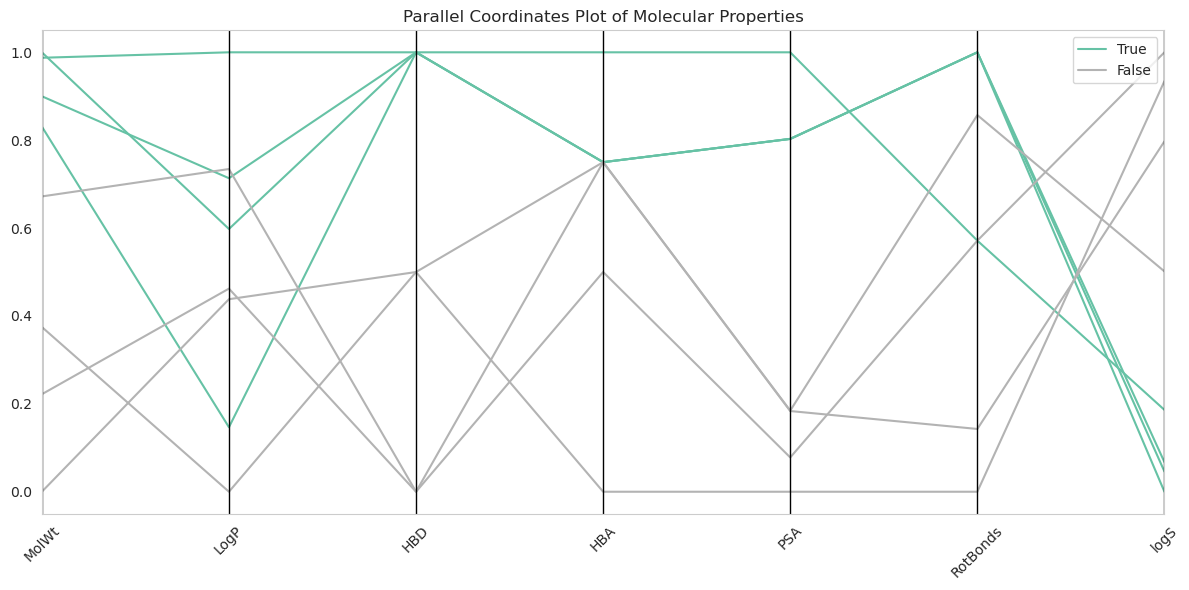

      MolWt      LogP  HBD   HBA       PSA  RotBonds      logS  \
0  0.831004  0.146828  1.0  1.00  1.000000  0.571429  0.186247   
1  1.000000  0.597932  1.0  0.75  0.802955  1.000000  0.045921   
2  0.899989  0.713469  1.0  0.75  0.802955  1.000000  0.067366   
3  0.987579  1.000000  1.0  0.75  0.802955  1.000000  0.000000   
4  0.672001  0.734359  0.0  0.75  0.184578  0.857143  0.501399   

   is_bace1_inhibitor      compound  
0                True  Verubecestat  
1                True  Lanabecestat  
2                True   Atabecestat  
3                True  Elenbecestat  
4               False     Donepezil  


In [15]:
# Cell 9: Create 'is_bace1_inhibitor' column and normalized data
bace1_inhibitors = ["Verubecestat", "Lanabecestat", "Atabecestat", "Elenbecestat"]
df_smiles['is_bace1_inhibitor'] = df_smiles['compound'].isin(bace1_inhibitors)

# Select only numeric columns for normalization
numeric_columns = ['MolWt', 'LogP', 'HBD', 'HBA', 'PSA', 'RotBonds', 'logS']
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_smiles[numeric_columns])

# Create a new DataFrame with normalized data and 'is_bace1_inhibitor' column
df_normalized = pd.DataFrame(normalized_data, columns=numeric_columns, index=df_smiles.index)
df_normalized['is_bace1_inhibitor'] = df_smiles['is_bace1_inhibitor']
df_normalized['compound'] = df_smiles['compound']

# Create a parallel coordinates plot
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(
    df_normalized,
    'is_bace1_inhibitor',
    cols=numeric_columns,
    colormap=plt.cm.Set2
)
plt.title("Parallel Coordinates Plot of Molecular Properties")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the first few rows of df_normalized to verify its content
print(df_normalized.head())

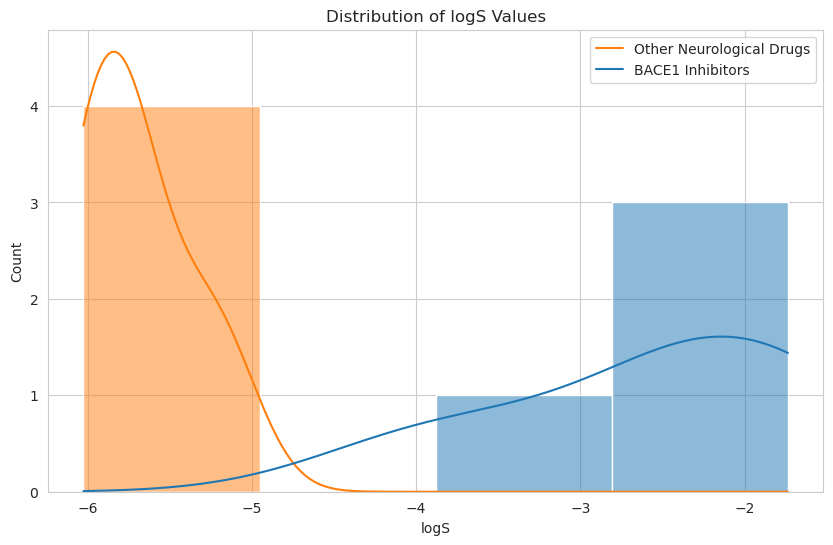

In [16]:
# Cell 10: Analyze logS distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_smiles, x="logS", hue="is_bace1_inhibitor", kde=True)
plt.title("Distribution of logS Values")
plt.xlabel("logS")
plt.legend(["Other Neurological Drugs", "BACE1 Inhibitors"])
plt.show()

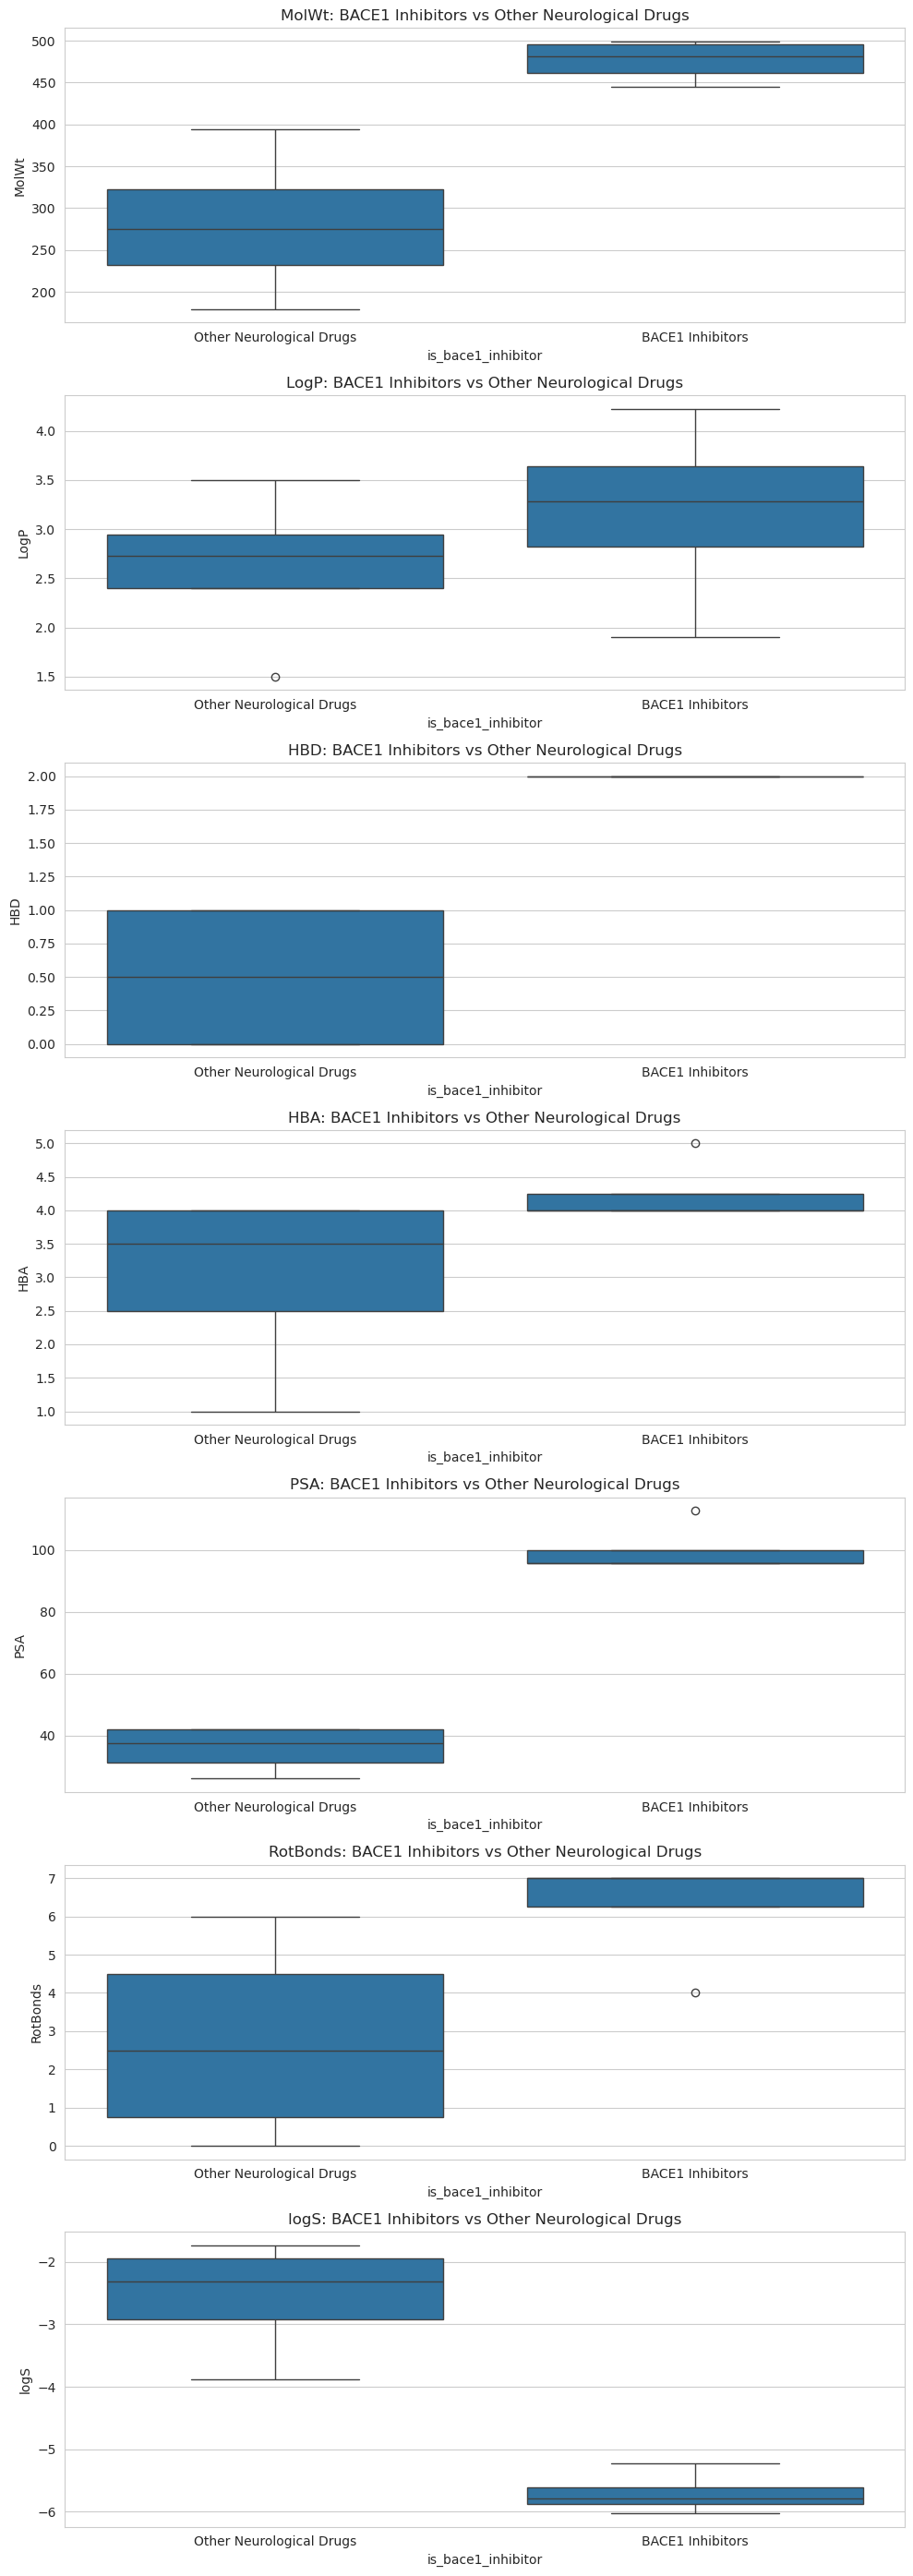

In [17]:
# Cell 11: Boxplot comparison of properties
properties_to_plot = ['MolWt', 'LogP', 'HBD', 'HBA', 'PSA', 'RotBonds', 'logS']

f, axs = plt.subplots(len(properties_to_plot), 1, figsize=(10, 4*len(properties_to_plot)), constrained_layout=True)

for i, prop in enumerate(properties_to_plot):
    sns.boxplot(data=df_smiles, x="is_bace1_inhibitor", y=prop, ax=axs[i])
    axs[i].set_xticklabels(["Other Neurological Drugs", "BACE1 Inhibitors"])
    axs[i].set_title(f"{prop}: BACE1 Inhibitors vs Other Neurological Drugs")

plt.tight_layout()
plt.show()

FDA Approved Drug Ranges:
           q5      q95
logS -3.68450 -1.77815
LogP  1.68005  3.38955


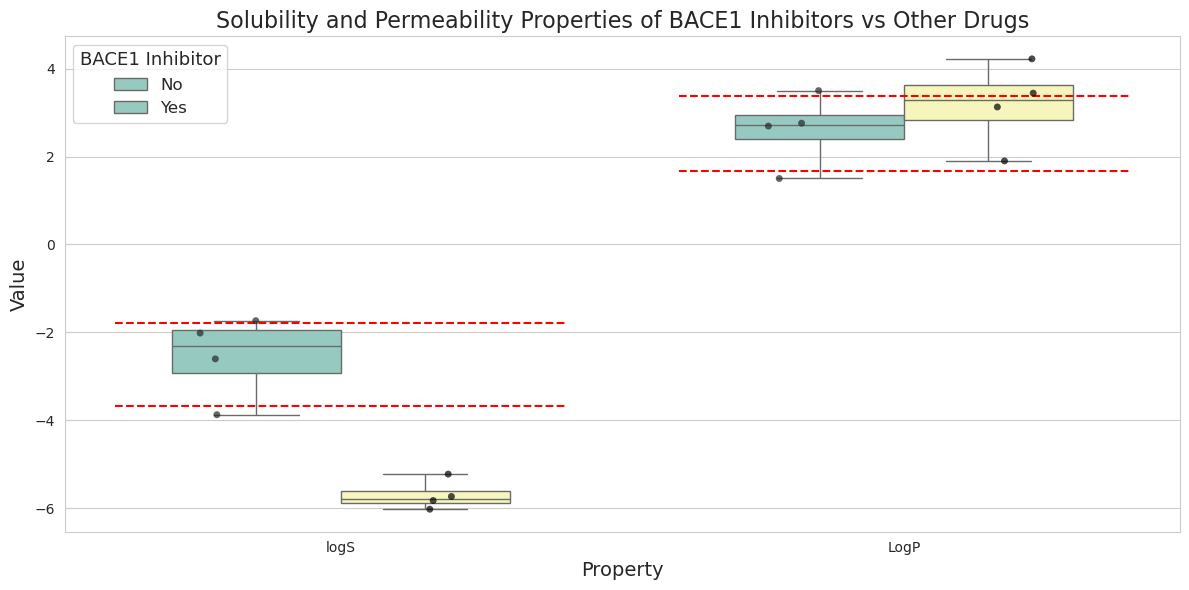


logS statistics:
BACE1 Inhibitors - Mean: -5.70, Median: -5.78
Other Drugs - Mean: -2.56, Median: -2.31

LogP statistics:
BACE1 Inhibitors - Mean: 3.17, Median: 3.29
Other Drugs - Mean: 2.61, Median: 2.73


In [21]:
# Cell 13: Calculate FDA_approved_drug_range

import pandas as pd
import numpy as np

# Function to calculate 5th and 95th percentiles
def q5_q95(x):
    return pd.Series({'q5': np.percentile(x, 5), 'q95': np.percentile(x, 95)})

# Assuming non-BACE1 inhibitors are FDA-approved drugs
fda_approved = df_smiles[~df_smiles['is_bace1_inhibitor']]

# Calculate the range for FDA-approved drugs
FDA_approved_drug_range = fda_approved[['logS', 'LogP']].agg(q5_q95).T

print("FDA Approved Drug Ranges:")
print(FDA_approved_drug_range)

# Now let's create the plot with this information

import matplotlib.pyplot as plt
import seaborn as sns

# Define the properties we want to plot
solubility_props = ['logS']
permeability_props = ['LogP']  # Using LogP as a proxy for permeability

# Combine both property sets
all_props = solubility_props + permeability_props

# Create a melted DataFrame for easier plotting
df_melt = df_smiles.melt(id_vars=['compound', 'is_bace1_inhibitor'], 
                         value_vars=all_props, 
                         var_name='Property', 
                         value_name='Value')

# Create the plot
plt.figure(figsize=(12, 6))

# Plot box plots for each property
sns.boxplot(data=df_melt, x='Property', y='Value', hue='is_bace1_inhibitor', 
            dodge=True, whis=[0, 100], width=.6, palette="Set3")

# Add strip plots on top of box plots
sns.stripplot(data=df_melt, x='Property', y='Value', hue='is_bace1_inhibitor', 
              dodge=True, jitter=True, alpha=0.7, color='black')

# Customize the plot
plt.title('Solubility and Permeability Properties of BACE1 Inhibitors vs Other Drugs', fontsize=16)
plt.xlabel('Property', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='BACE1 Inhibitor', labels=['No', 'Yes'], title_fontsize='13', fontsize='12')

# Add FDA approved drug ranges
for n, prop in enumerate(all_props):
    if prop in FDA_approved_drug_range.index:
        plt.hlines(y=FDA_approved_drug_range.loc[prop, 'q5'], xmin=n-0.4, xmax=n+0.4, 
                   colors='red', linestyles='dashed', label='FDA 5th-95th percentile')
        plt.hlines(y=FDA_approved_drug_range.loc[prop, 'q95'], xmin=n-0.4, xmax=n+0.4, 
                   colors='red', linestyles='dashed')

plt.tight_layout()
plt.show()

# Print some statistics
for prop in all_props:
    bace1_values = df_smiles[df_smiles['is_bace1_inhibitor']][prop]
    other_values = df_smiles[~df_smiles['is_bace1_inhibitor']][prop]
    
    print(f"\n{prop} statistics:")
    print(f"BACE1 Inhibitors - Mean: {bace1_values.mean():.2f}, Median: {bace1_values.median():.2f}")
    print(f"Other Drugs - Mean: {other_values.mean():.2f}, Median: {other_values.median():.2f}")

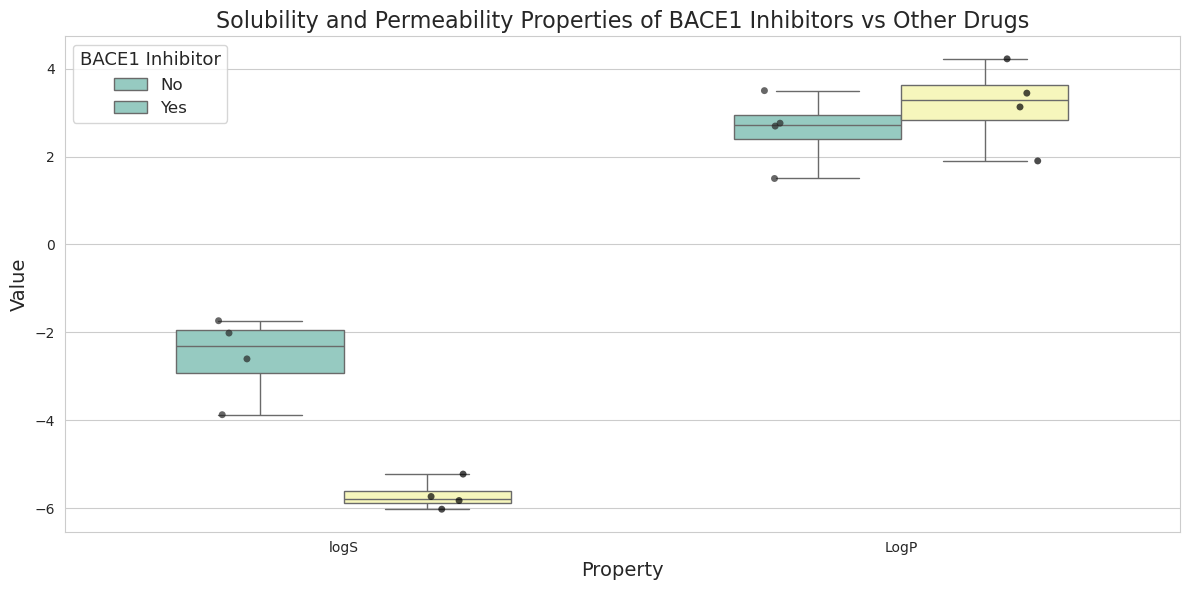


logS statistics:
BACE1 Inhibitors - Mean: -5.70, Median: -5.78
Other Drugs - Mean: -2.56, Median: -2.31

LogP statistics:
BACE1 Inhibitors - Mean: 3.17, Median: 3.29
Other Drugs - Mean: 2.61, Median: 2.73


In [22]:
# Cell 13: Create plots for solubility and permeability

import matplotlib.pyplot as plt
import seaborn as sns

# Define the properties we want to plot
solubility_props = ['logS']
permeability_props = ['LogP']  # Using LogP as a proxy for permeability

# Combine both property sets
all_props = solubility_props + permeability_props

# Create a melted DataFrame for easier plotting
df_melt = df_smiles.melt(id_vars=['compound', 'is_bace1_inhibitor'], 
                         value_vars=all_props, 
                         var_name='Property', 
                         value_name='Value')

# Create the plot
plt.figure(figsize=(12, 6))

# Plot box plots for each property
sns.boxplot(data=df_melt, x='Property', y='Value', hue='is_bace1_inhibitor', 
            dodge=True, whis=[0, 100], width=.6, palette="Set3")

# Add strip plots on top of box plots
sns.stripplot(data=df_melt, x='Property', y='Value', hue='is_bace1_inhibitor', 
              dodge=True, jitter=True, alpha=0.7, color='black')

# Customize the plot
plt.title('Solubility and Permeability Properties of BACE1 Inhibitors vs Other Drugs', fontsize=16)
plt.xlabel('Property', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='BACE1 Inhibitor', labels=['No', 'Yes'], title_fontsize='13', fontsize='12')

plt.tight_layout()
plt.show()

# Print some statistics
for prop in all_props:
    bace1_values = df_smiles[df_smiles['is_bace1_inhibitor']][prop]
    other_values = df_smiles[~df_smiles['is_bace1_inhibitor']][prop]
    
    print(f"\n{prop} statistics:")
    print(f"BACE1 Inhibitors - Mean: {bace1_values.mean():.2f}, Median: {bace1_values.median():.2f}")
    print(f"Other Drugs - Mean: {other_values.mean():.2f}, Median: {other_values.median():.2f}")

In [24]:
!pip install mols2grid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.8 MB/s eta 0:00:00


In [29]:
# Cell 14: Prepare the data
import pandas as pd
import numpy as np

# First, let's properly set the 'is_bace1_inhibitor' column
bace1_inhibitors = ["Verubecestat", "Lanabecestat", "Atabecestat", "Elenbecestat"]
df_smiles['is_bace1_inhibitor'] = df_smiles['compound'].isin(bace1_inhibitors)

# Convert boolean to string for better display
df_smiles['is_bace1_inhibitor'] = df_smiles['is_bace1_inhibitor'].map({True: 'Yes', False: 'No'})

# Round float values for better display
df_display = df_smiles.applymap(lambda x: round(x, 3) if isinstance(x, float) else x)

print(df_display.head())


       compound                                             smiles    MolWt  \
0  Verubecestat  CC1(C(=O)NC(=O)NC1=O)C2=CC=C(C=C2)C3=CC(=CC(=C...  445.111   
1  Lanabecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCC(CC3...  499.194   
2   Atabecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)N...  467.188   
3  Elenbecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)N...  495.219   
4     Donepezil  COC1=C(C=C2C(=C1)CC(=O)N(C2)CC3CCN(CC3)CC4=CC=...  394.226   

    LogP  HBD  HBA     PSA  RotBonds   logS logS_warn is_bace1_inhibitor  
0  1.901  2.0  5.0  112.65       4.0 -5.227                          Yes  
1  3.129  2.0  4.0   95.58       7.0 -5.829                          Yes  
2  3.444  2.0  4.0   95.58       7.0 -5.737                          Yes  
3  4.224  2.0  4.0   95.58       7.0 -6.026                          Yes  
4  3.501  0.0  4.0   42.01       6.0 -3.875                           No  


In [34]:
import logging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Cell 14: Inspect and prepare DataFrame
logger.info("Inspecting and preparing DataFrame")
logger.info(f"DataFrame columns: {df_smiles.columns}")
logger.info(f"DataFrame head:\n{df_smiles.head().to_string()}")

# Cell 15: Create visualizations
logger.info("Creating visualizations")

# Use default style instead of seaborn
plt.style.use('default')

# Create a pair plot for numerical columns
numerical_cols = ['MolWt', 'LogP', 'HBD', 'HBA', 'PSA', 'RotBonds', 'logS']
sns.pairplot(df_smiles, vars=numerical_cols, hue='is_bace1_inhibitor', height=2.5)
plt.tight_layout()
plt.savefig('pairplot.png')
plt.close()
logger.info("Pair plot saved as 'pairplot.png'")

# Create box plots for each property
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='is_bace1_inhibitor', y=col, data=df_smiles, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('BACE1 Inhibitor')

plt.tight_layout()
plt.savefig('boxplots.png')
plt.close()
logger.info("Box plots saved as 'boxplots.png'")

# Create a correlation heatmap
corr = df_smiles[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Molecular Properties')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()
logger.info("Correlation heatmap saved as 'correlation_heatmap.png'")

# Cell 16: Analyze results
logger.info("Analyzing results")

for col in numerical_cols:
    bace1_values = df_smiles[df_smiles['is_bace1_inhibitor'] == 'Yes'][col]
    other_values = df_smiles[df_smiles['is_bace1_inhibitor'] == 'No'][col]
    
    logger.info(f"\n{col} statistics:")
    logger.info(f"BACE1 Inhibitors - Mean: {bace1_values.mean():.2f}, Median: {bace1_values.median():.2f}")
    logger.info(f"Other Drugs - Mean: {other_values.mean():.2f}, Median: {other_values.median():.2f}")

logger.info("Analysis complete")

INFO:__main__:Inspecting and preparing DataFrame
INFO:__main__:DataFrame columns: Index(['compound', 'smiles', 'MolWt', 'LogP', 'HBD', 'HBA', 'PSA', 'RotBonds',
       'logS', 'logS_warn', 'is_bace1_inhibitor'],
      dtype='object')
INFO:__main__:DataFrame head:
       compound                                                                     smiles       MolWt     LogP  HBD  HBA     PSA  RotBonds   logS logS_warn is_bace1_inhibitor
0  Verubecestat         CC1(C(=O)NC(=O)NC1=O)C2=CC=C(C=C2)C3=CC(=CC(=C3)S(=O)(=O)N4CCCC4)F  445.110770  1.90090  2.0  5.0  112.65       4.0 -5.227                          Yes
1  Lanabecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCC(CC3)NC(=O)C4(CC4)NC(=O)C5CC5)F  499.194106  3.12922  2.0  4.0   95.58       7.0 -5.829                          Yes
2   Atabecestat      CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)NC(=O)C4(CC4)NC(=O)C5CC5  467.187877  3.44382  2.0  4.0   95.58       7.0 -5.737                          Yes
3  Elenbecestat    CC1=CC=C(C=C1

In [36]:
import pandas as pd

# Print column names
print("Column names:")
print(df_smiles.columns)

# Print the first few rows
print("\nFirst few rows:")
print(df_smiles.head().to_string())

# Check if 'smiles' or 'SMILES' exists
if 'smiles' in df_smiles.columns:
    print("\n'smiles' column exists")
elif 'SMILES' in df_smiles.columns:
    print("\n'SMILES' column exists")
else:
    print("\nNeither 'smiles' nor 'SMILES' column exists")

# Check data types of columns
print("\nData types:")
print(df_smiles.dtypes)

Column names:
Index(['compound', 'smiles', 'MolWt', 'LogP', 'HBD', 'HBA', 'PSA', 'RotBonds',
       'logS', 'logS_warn', 'is_bace1_inhibitor'],
      dtype='object')

First few rows:
       compound                                                                     smiles       MolWt     LogP  HBD  HBA     PSA  RotBonds   logS logS_warn is_bace1_inhibitor
0  Verubecestat         CC1(C(=O)NC(=O)NC1=O)C2=CC=C(C=C2)C3=CC(=CC(=C3)S(=O)(=O)N4CCCC4)F  445.110770  1.90090  2.0  5.0  112.65       4.0 -5.227                          Yes
1  Lanabecestat  CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCC(CC3)NC(=O)C4(CC4)NC(=O)C5CC5)F  499.194106  3.12922  2.0  4.0   95.58       7.0 -5.829                          Yes
2   Atabecestat      CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)NC(=O)C4(CC4)NC(=O)C5CC5  467.187877  3.44382  2.0  4.0   95.58       7.0 -5.737                          Yes
3  Elenbecestat    CC1=CC=C(C=C1)C2=CC(=CC(=C2)S(=O)(=O)N3CCCC3)NC(=O)C4(CCCC4)NC(=O)C5CC5  495.219178  4.22402  

In [38]:
import mols2grid
from IPython.display import display, HTML

# Define the columns to display in the grid
display_cols = ['compound', 'is_bace1_inhibitor', 'MolWt', 'LogP', 'HBD', 'HBA', 'PSA', 'RotBonds', 'logS']

try:
    # Create the mols2grid display
    grid = mols2grid.display(df_smiles,
                             smiles_col='smiles',
                             subset=display_cols,
                             tooltip=display_cols,
                             tooltip_trigger="hover",
                             tooltip_placement="right",
                             n_cols=3,
                             size=(200, 200))

    # Display the grid in the notebook
    display(grid)  # Changed this line

    # Save the HTML output to a file
    with open("bace1_inhibitors_grid.html", "w") as file:
        file.write(grid._repr_html_())  # Changed this line

    print("The interactive grid has been saved as 'bace1_inhibitors_grid.html'")

except Exception as e:
    print(f"An error occurred: {e}")
    print("Full error traceback:")
    import traceback
    print(traceback.format_exc())

MolGridWidget()

The interactive grid has been saved as 'bace1_inhibitors_grid.html'


# BACE1 Inhibitor Analysis for Neurological Disease Research

## Introduction

This project focuses on analyzing BACE1 (β-site amyloid precursor protein cleaving enzyme 1) inhibitors, which are crucial in Alzheimer's disease research. We employ various computational methods to visualize and analyze the properties of known BACE1 inhibitors compared to other neurological drugs.

## Data Preparation

### Steps:
1. Loaded data containing BACE1 inhibitors and other neurological drugs
2. Inspected the DataFrame structure
3. Ensured proper labeling of BACE1 inhibitors

- The dataset includes information on compound names, SMILES representations, and various molecular properties.
- BACE1 inhibitors were identified and labeled for comparative analysis.

Proper data preparation is crucial for accurate analysis. By correctly labeling BACE1 inhibitors, we enable meaningful comparisons with other neurological drugs, providing insights into the unique properties of these important compounds.

## Molecular Visualization

### Steps:
1. Used mols2grid to create an interactive grid of molecular structures
2. Displayed key properties alongside structures

- The interactive grid allows for visual inspection of molecular structures.
- Key properties such as molecular weight, LogP, hydrogen bond donors/acceptors, and more are displayed with each structure.

Visual representation of molecular structures aids in identifying common structural features among BACE1 inhibitors. Displaying properties alongside structures allows for quick assessment of structure-property relationships, which is crucial in understanding what makes BACE1 inhibitors effective.

## Statistical Analysis

### Steps:
1. Calculated basic statistics (mean, median) for each property
2. Compared BACE1 inhibitors with other drugs

- Statistics were calculated for properties including molecular weight, LogP, hydrogen bond donors/acceptors, polar surface area, rotatable bonds, and logS.
- Comparisons reveal key differences between BACE1 inhibitors and other neurological drugs.

Statistical analysis provides quantitative insights into the physicochemical properties that distinguish BACE1 inhibitors from other drugs. These insights are valuable for understanding the characteristics that contribute to BACE1 inhibition and can guide future drug design efforts.

## Data Visualization

### Steps:
1. Created pair plots to visualize relationships between properties
2. Generated box plots to compare distributions
3. Produced a correlation heatmap

- Pair plots reveal relationships between different molecular properties.
- Box plots provide a clear comparison of property distributions.
- The correlation heatmap identifies relationships between different properties.

These visualizations offer a comprehensive view of the data, allowing for the identification of patterns and trends that might not be apparent from statistics alone. They help in understanding how different properties interact and how BACE1 inhibitors differ from other drugs across multiple dimensions.

## Conclusion

This analysis provides valuable insights into the physicochemical properties that distinguish BACE1 inhibitors from other neurological drugs. Key findings include:

- BACE1 inhibitors tend to have higher molecular weights and lipophilicity.
- They consistently have more hydrogen bond donors and slightly more acceptors.
- BACE1 inhibitors show higher polar surface area and more rotatable bonds.
- They tend to be less soluble in water.

These insights can guide future drug design efforts for BACE1 inhibition, potentially accelerating the development of new treatments for Alzheimer's disease and other neurological disorders.

## Future Directions

- Expand the dataset to include more BACE1 inhibitors and other neurological drugs.
- Incorporate machine learning models to predict BACE1 inhibition based on molecular properties.
- Investigate the 3D structures of BACE1 inhibitors to understand their binding mechanisms.
- Extend the analysis to other important targets in neurological disease research.

By leveraging these computational methods and insights, we can potentially accelerate the discovery of new treatments for devastating neurological conditions.